In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree 

In [37]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
labels = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5', 'attribute_6', 'attribute_7', 'attribute_8', 'attribute_9', 'attribute_10', 'attribute_11', 'attribute_12', 'attribute_13', 'attribute_14', 'attribute_15', 'attribute_16', 'attribute_17', 'attribute_18', 'attribute_19', 'attribute_20', 'attribute_21', 'attribute_22', 'attribute_23', 'attribute_24', 'attribute_25', 'attribute_26', 'attribute_27', 'attribute_28', 'attribute_29', 'attribute_30']

df = pd.DataFrame(data.data, columns=labels)
df['target'] = data.target

In [38]:
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
X = df.iloc[:, 0:len(df.columns) - 1]
Y =  df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Text(0.5, 0.875, 'attribute_28 <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]\nclass = Class 0'),
 Text(0.25, 0.625, 'attribute_24 <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]\nclass = Class 0'),
 Text(0.125, 0.375, 'attribute_23 <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]\nclass = Class 0'),
 Text(0.0625, 0.125, 'gini = 0.036\nsamples = 269\nvalue = [5, 264]\nclass = Class 0'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]\nclass = Class 0'),
 Text(0.375, 0.375, 'attribute_9 <= 0.152\ngini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Class 1'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Class 0'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Class 1'),
 Text(0.75, 0.625, 'attribute_24 <= 729.55\ngini = 0.134\nsamples = 152\nvalue = [141, 11]\nclass = Class 1'),
 Text(0.625, 0.375, 'attribute_5 <= 0.108\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = Class 0'),
 Tex

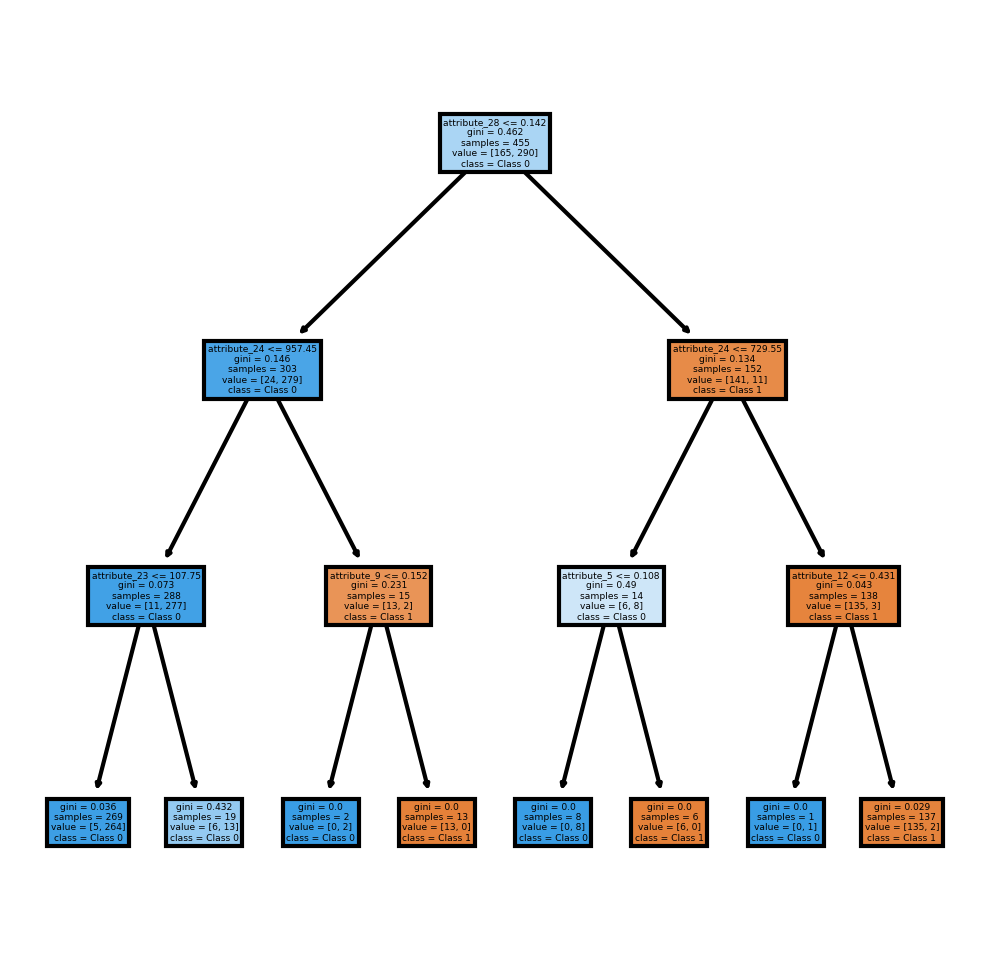

In [41]:
cn=['Class 1', 'Class 0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = labels, 
               class_names=cn,
               filled = True)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, log_loss, precision_score, recall_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:{}, Precision:{}, Recall:{}, AUC:{}, F1-score:{}'.format(accuracy, precision,recall,auc,f1))

Accuracy:0.9649122807017544, Precision:0.9565217391304348, Recall:0.9850746268656716, AUC:0.9606224198158145, F1-score:0.9705882352941176


In [43]:
import itertools
def plot_confusion_matrix(cm, classes,  normalize=False,    title='Confusion matrix',  cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

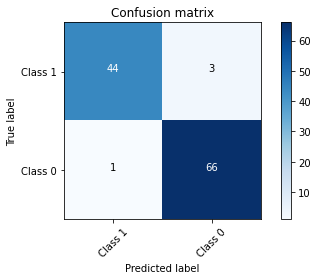

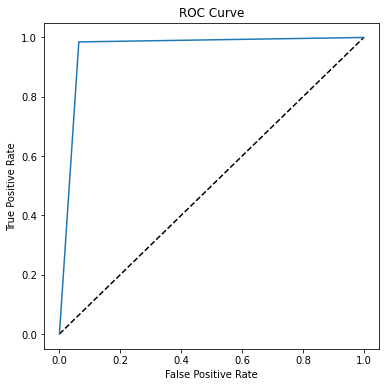

In [44]:
class_label = ['Class 1', 'Class 0']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_label, title='Confusion matrix')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()